<a href="https://colab.research.google.com/github/felipecadm/carteira-de-ativos/blob/main/Visualiza%C3%A7%C3%A3o%20e%20An%C3%A1lise%20de%20Ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install -q yfinance

In [69]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import yfinance as yf

In [70]:
acoes = ['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']
acoes

['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']

In [71]:
acoes_df = pd.DataFrame()

In [72]:
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-02-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [73]:
acoes_df

,ENBR3.SA,ITSA4.SA,PETR4.SA,BOVA11.SA
Date,,,,
2015-02-02,8.795126,6.545879,8.790000,46.270000
2015-02-03,8.479606,6.758638,9.970000,47.639999
2015-02-04,8.321846,7.006857,10.020000,47.770000
2015-02-05,8.183806,7.006857,9.830000,47.880001
2015-02-06,8.085206,7.091960,9.120000,47.299999
...,...,...,...,...
2022-08-26,22.940001,9.350000,33.639999,108.360001
2022-08-29,22.530001,9.290000,34.480000,108.400002
2022-08-30,22.160000,9.340000,32.430000,106.400002


In [76]:
acoes_df.to_csv('acoes-df.csv')

In [77]:
acoes_df = acoes_df.rename(columns={'ENBR3.SA': 'EDP', 'ITSA4.SA': 'ITSA', 'PETR4.SA': 'PETR', 'BOVA11.SA': 'IBOV'})

In [78]:
acoes_df

,EDP,ITSA,PETR,IBOV
Date,,,,
2015-02-02,8.795126,6.545879,8.790000,46.270000
2015-02-03,8.479606,6.758638,9.970000,47.639999
2015-02-04,8.321846,7.006857,10.020000,47.770000
2015-02-05,8.183806,7.006857,9.830000,47.880001
2015-02-06,8.085206,7.091960,9.120000,47.299999
...,...,...,...,...
2022-08-26,22.940001,9.350000,33.639999,108.360001
2022-08-29,22.530001,9.290000,34.480000,108.400002
2022-08-30,22.160000,9.340000,32.430000,106.400002


In [79]:
acoes_df.to_csv('acoes_.csv')

In [80]:
acoes_df.isnull().sum()

EDP     0
ITSA    1
PETR    0
IBOV    0
dtype: int64

In [81]:
acoes_df.to_csv('acoes.csv')

In [82]:
acoes_df.describe()

,EDP,ITSA,PETR,IBOV
count,1886.000000,1885.000000,1886.000000,1886.000000
mean,16.052893,9.260625,20.168287,81.115966
std,3.488997,2.024418,7.853676,23.697855
min,7.868286,4.910443,4.200000,36.450001
25%,13.472500,7.627705,13.575000,59.952500
50%,15.205000,9.350000,20.770000,82.174999
75%,18.959999,10.761904,27.150000,101.172499
max,24.170000,13.666666,37.230000,125.750000


In [83]:
acoes_df.columns

Index(['EDP', 'ITSA', 'PETR', 'IBOV'], dtype='object')

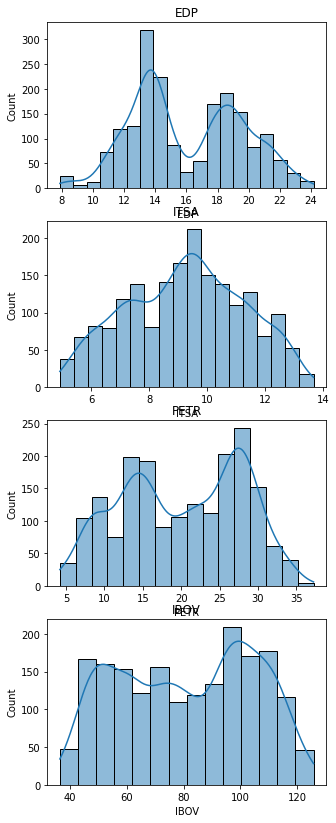

In [84]:
plt.figure(figsize=(5,25))
i = 0
for i in np.arange(0,len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde= True)
  plt.title(acoes_df.columns[i])

In [85]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
type(acoes_df_normalizado)

pandas.core.frame.DataFrame

In [86]:
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV
Date,,,,
2015-02-02,1.000000,1.000000,1.000000,1.000000
2015-02-03,0.964126,1.032503,1.134243,1.029609
2015-02-04,0.946188,1.070423,1.139932,1.032418
2015-02-05,0.930493,1.070423,1.118316,1.034796
2015-02-06,0.919283,1.083424,1.037543,1.022261
...,...,...,...,...
2022-08-26,2.608263,1.428380,3.827076,2.341906
2022-08-29,2.561646,1.419214,3.922639,2.342771
2022-08-30,2.519577,1.426852,3.689420,2.299546


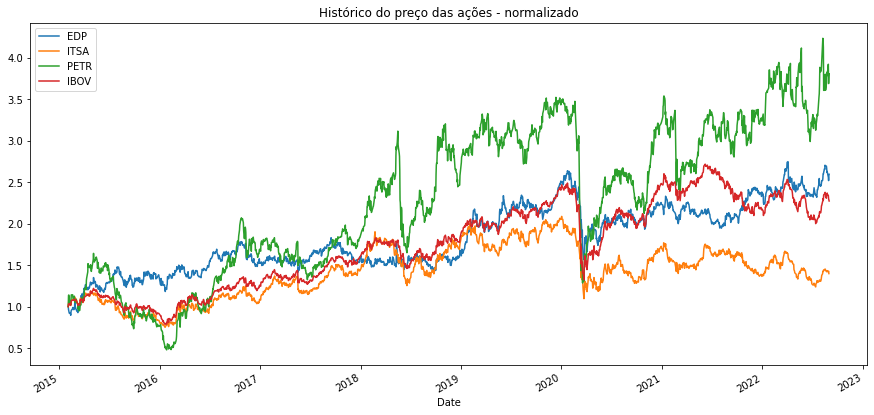

In [87]:
acoes_df_normalizado.plot(figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [88]:
# valorização da compra até o dia atual
for ativo in acoes_df.columns:
  print(ativo, ((acoes_df[ativo][len(acoes_df) - 1] - acoes_df[ativo][0]) / acoes_df[ativo][0]) * 100)

EDP 159.5755879353198
ITSA nan
PETR 280.7736219107706
IBOV 127.33953187968115


In [89]:
# Carteira composta por ativos para efeito de comparação com índice Bovespa
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['EDP'] + acoes_df_normalizado['ITSA'] + acoes_df_normalizado['PETR']) / 3
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV,CARTEIRA
Date,,,,,
2015-02-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-02-03,0.964126,1.032503,1.134243,1.029609,1.043624
2015-02-04,0.946188,1.070423,1.139932,1.032418,1.052181
2015-02-05,0.930493,1.070423,1.118316,1.034796,1.039744
2015-02-06,0.919283,1.083424,1.037543,1.022261,1.013416
...,...,...,...,...,...
2022-08-26,2.608263,1.428380,3.827076,2.341906,2.621240
2022-08-29,2.561646,1.419214,3.922639,2.342771,2.634500
2022-08-30,2.519577,1.426852,3.689420,2.299546,2.545283


In [90]:
# Gráfico dinâmico 
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in acoes_df_normalizado.columns[-2:]:
  figura.add_scatter(x = acoes_df_normalizado.index, y = acoes_df_normalizado[i], name = i)
figura.show()

###Retorno Anual por Ativos (Taxa Logarítica)

In [91]:
Retorno_Anual = pd.DataFrame(columns=acoes_df.columns[0:3], index=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


In [92]:
data_final = '-12-31'
for ativo in acoes_df.columns[0:3]:
  resultados = []
  for ano in Retorno_Anual.index:
    fim_ano_passado = (str(ano-1) + data_final)
    fim_ano_atual = (str(ano) + data_final)
    valor_inicio_ano = acoes_df[(acoes_df[ativo].index > fim_ano_passado) & (acoes_df[ativo].index <= fim_ano_atual)][ativo][0]
    valor_final_ano = acoes_df[(acoes_df[ativo].index > fim_ano_passado) & (acoes_df[ativo].index <= fim_ano_atual)][ativo][-1]
    resultados.append(np.log(valor_final_ano / valor_inicio_ano) * 100)
  Retorno_Anual[ativo] = resultados

In [93]:
Retorno_Anual

,EDP,ITSA,PETR
2015,29.993861,-19.622280,-27.150721
2016,18.720852,32.208342,77.218166
2017,4.380265,28.263849,9.369661
2018,3.800113,18.624252,31.509744
2019,44.374508,10.780811,22.662878
2020,-10.886583,-20.160031,-7.998844
2021,6.817459,-20.847884,-1.603936
2022,9.601127,NaN,14.025507


## Volatilidade & Retorno Diário  por Ativo

In [94]:
# taxa de retorno simples (RS) - diário
Valorização_Diária = pd.DataFrame()
for ativo in Retorno_Anual.columns:
  Valorização_Diária[ativo] = (acoes_df[ativo] / acoes_df[ativo].shift(1)) - 1


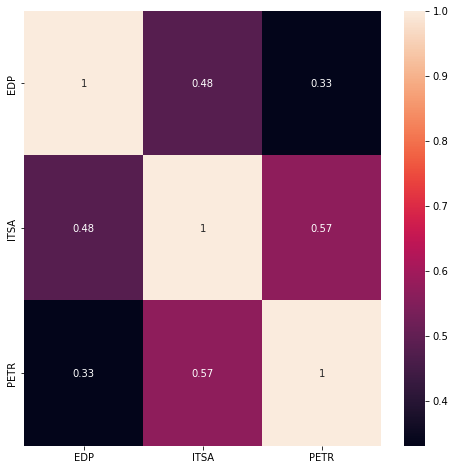

In [95]:
# correlação dos resultados das empresas - setores diferentes
plt.figure(figsize=(8,8))
sns.heatmap(Valorização_Diária.corr(), annot=True);

In [96]:
volatilidade_anual = pd.DataFrame(index=Retorno_Anual.index)
Média_Valorização_Diária = pd.DataFrame(index=volatilidade_anual.index)


    

In [97]:
for ativo in Valorização_Diária.columns[0:3]:
  for ano in volatilidade_anual.index:
    fim_ano_passado = str(ano-1) + data_final
    fim_ano_atual = str(ano) + data_final
    resultados_ano_atual = Valorização_Diária[(Valorização_Diária[ativo].index > fim_ano_passado) & (Valorização_Diária[ativo].index <= fim_ano_atual)][ativo]
    volatilidade_anual.at[ano, ativo] = resultados_ano_atual.std() * np.sqrt(252) * 100
    Média_Valorização_Diária.at[ano, ativo] = resultados_ano_atual.mean() * 100




In [98]:
volatilidade_anual

,EDP,ITSA,PETR
2015,36.532771,30.375318,57.466120
2016,28.390884,34.524807,63.991431
2017,23.232925,23.038378,35.527337
2018,32.806816,32.806266,52.335250
2019,26.356083,24.680384,29.060190
2020,39.600448,44.366740,68.452609
2021,21.104623,26.660920,44.016146
2022,23.162848,21.845064,43.586982


In [99]:
Média_Valorização_Diária

,EDP,ITSA,PETR
2015,0.160100,-0.069369,-0.056722
2016,0.064599,0.136185,0.400934
2017,0.027962,0.118578,0.056837
2018,0.042215,0.104831,0.194134
2019,0.176912,0.074113,0.131952
2020,-0.016152,-0.034743,0.072153
2021,0.034535,-0.076607,0.041145
2022,0.061825,0.023870,0.134727
